<a href="https://colab.research.google.com/github/21cs043kanivarshini/Naan-Mudhalvan-projects/blob/main/Stock_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'tsla-stock-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3626523%2F7543429%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240509%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240509T124844Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D889bc59c81c2aa52097208b7c3140df3b2c3bea3f43980fab5f1d921a3b5eaa7f6826dca2339c00876a354b48c3e73bcf28d1475e7edc9f29ad6f2b3e1c9ed2023035cfa7e9924868e5d6fee9f7bfa9fdadca8590978d2a34953b08b83ed683f4a8dde851e078f3d4626a3d2151e736bb0021f753a98713f4c80f2e5b154c55ab46b604eeaea7337d09b03517896dfc19c6447b622ba171ed8c507cc236c359ba4eb422f05dce25bce69312c156c496aa427671ec3dfef694ed0005cbfafbd2e0153b0c22a98fa03907d10c5712aae6a2fce2f587d2e1059c24468df78d55df20177a5ebe416693e0338be289c2bf3ffbe6ebd9c29fb3aea1840f3be772961d8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 222434 bytes downloaded
Downloaded and uncompressed: tsla-stock-data
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsla-stock-data/tsla_raw_data.csv
/kaggle/input/tsla-stock-data/tsla_split_adjusted.csv


**Hi there! In this EDA projects we will be perfroming tesla stock data analysis which is present on kaggle platform itself, we will be using multiple libraries in this project which will help us in analysing and visualizing our dataset. Visualizing is important as it helps people/developers see, interact with, and better understand the data**

**Libraries to be used during this project**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns


**Initialise the data**

In [5]:
data = pd.read_csv('/kaggle/input/tsla-stock-data/tsla_raw_data.csv')
data

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,2010-06-29,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,NaN,NaN
1,2010-06-30,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,NaN
2,2010-07-01,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,NaN
3,2010-07-02,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,NaN
4,2010-07-06,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,NaN
...,...,...,...,...,...,...,...,...,...
3418,2024-01-29,185.6300,191.4800,183.6700,190.9300,125013102,190.9300,4.19,1.115951e+08
3419,2024-01-30,195.3300,196.3593,190.6100,191.5900,109982305,191.5900,0.35,1.120496e+08
3420,2024-01-31,186.9950,193.9700,185.8459,187.2900,103221398,187.2900,-2.24,1.119780e+08
3421,2024-02-01,188.5000,189.8800,184.2800,188.8600,91843281,188.8600,0.84,1.105160e+08


**Data information**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3423 entries, 0 to 3422
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3423 non-null   object 
 1   open            3423 non-null   float64
 2   high            3423 non-null   float64
 3   low             3423 non-null   float64
 4   close           3423 non-null   float64
 5   volume          3423 non-null   int64  
 6   adjusted_close  3423 non-null   float64
 7   change_percent  3422 non-null   float64
 8   avg_vol_20d     3404 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 240.8+ KB


**Finding null values**

In [7]:
data.isnull().sum()

date               0
open               0
high               0
low                0
close              0
volume             0
adjusted_close     0
change_percent     1
avg_vol_20d       19
dtype: int64

**Filling null values with zero**

In [8]:
data.fillna(0)

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,2010-06-29,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,0.00,0.000000e+00
1,2010-06-30,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,0.000000e+00
2,2010-07-01,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,0.000000e+00
3,2010-07-02,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,0.000000e+00
4,2010-07-06,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,0.000000e+00
...,...,...,...,...,...,...,...,...,...
3418,2024-01-29,185.6300,191.4800,183.6700,190.9300,125013102,190.9300,4.19,1.115951e+08
3419,2024-01-30,195.3300,196.3593,190.6100,191.5900,109982305,191.5900,0.35,1.120496e+08
3420,2024-01-31,186.9950,193.9700,185.8459,187.2900,103221398,187.2900,-2.24,1.119780e+08
3421,2024-02-01,188.5000,189.8800,184.2800,188.8600,91843281,188.8600,0.84,1.105160e+08


**Describe the data**

In [9]:
data.describe()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
count,3423.000000,3423.000000,3423.000000,3423.000000,3.423000e+03,3423.000000,3422.000000,3.404000e+03
mean,307.473258,314.249160,300.448268,307.523431,2.251026e+07,71.436729,0.203387,9.688754e+07
std,290.739984,298.759443,282.554895,290.938693,3.957476e+07,101.828183,3.582490,6.375752e+07
min,16.140000,16.629900,14.979900,15.800100,1.186140e+05,1.053300,-21.060000,4.317139e+06
25%,150.000000,154.854900,146.452500,149.984950,3.207180e+06,10.945000,-1.567500,5.529235e+07
50%,234.999900,238.980000,230.799900,235.140000,6.824971e+06,16.999300,0.120000,8.892636e+07
75%,338.990100,344.625000,332.925000,337.920000,2.017835e+07,123.390000,1.930000,1.274765e+08
max,2295.120000,2318.490000,2186.520000,2238.750000,3.065906e+08,409.970000,24.400000,3.886315e+08


**Data shape**

In [10]:
data.shape

(3423, 9)

***Now we will find out the movement of the tesla stock from 2010 to 2023**

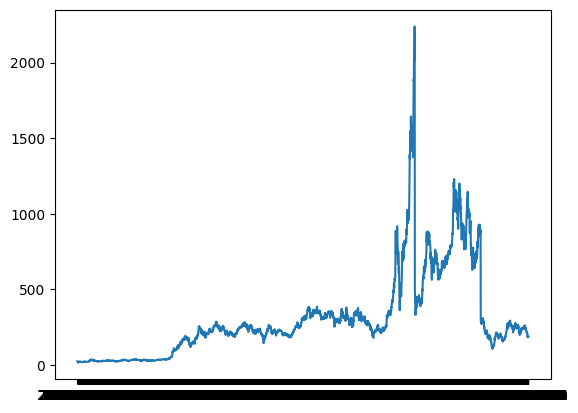

In [11]:
plt.plot(data.date,data.close)

***Now we will Find out stock movement in the year of 2023**

**^Cleaning the data based on our needs**

In [12]:
a=data[data['date'] < '2022-12-31'].index
b=data.drop(a)
b

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
3150,2023-01-03,118.470,118.8000,104.6400,108.10,231402797,108.10,-12.24,1.510979e+08
3151,2023-01-04,109.110,114.5900,107.5200,113.64,180388984,113.64,5.12,1.554612e+08
3152,2023-01-05,110.510,111.7500,107.1601,110.34,157986297,110.34,-2.90,1.587530e+08
3153,2023-01-06,103.000,114.3900,101.8100,113.06,220911109,113.06,2.47,1.655879e+08
3154,2023-01-09,118.960,123.5200,117.1100,119.77,190284000,119.77,5.93,1.702209e+08
...,...,...,...,...,...,...,...,...,...
3418,2024-01-29,185.630,191.4800,183.6700,190.93,125013102,190.93,4.19,1.115951e+08
3419,2024-01-30,195.330,196.3593,190.6100,191.59,109982305,191.59,0.35,1.120496e+08
3420,2024-01-31,186.995,193.9700,185.8459,187.29,103221398,187.29,-2.24,1.119780e+08
3421,2024-02-01,188.500,189.8800,184.2800,188.86,91843281,188.86,0.84,1.105160e+08


**Tesla Stock movement in the year of 2023**

<function matplotlib.pyplot.show(close=None, block=None)>

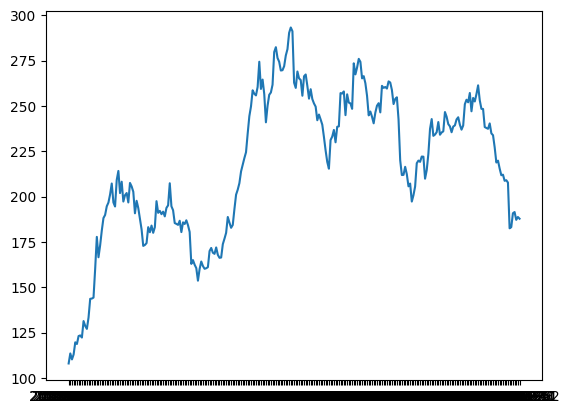

In [13]:
plt.plot(b.date,b.close)
plt.show

**Now we will find out which day have highest volume**

In [14]:
volumes=data['volume'].sort_values(ascending=False).head(10)
volumes

3167    306590594
3166    234815109
3172    232662000
3150    231402797
3168    230878797
3181    229586500
2638    222126196
3148    221923297
3147    221070500
3153    220911109
Name: volume, dtype: int64

<Axes: >

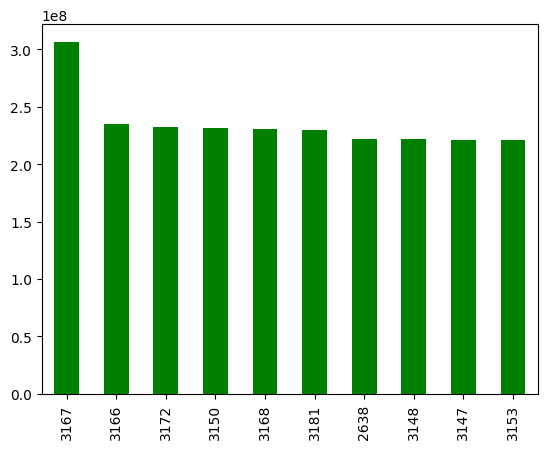

In [15]:
volumes.plot(kind='bar',color='g')

**Now we will find out Profitable days vs Loss days**

<function matplotlib.pyplot.show(close=None, block=None)>

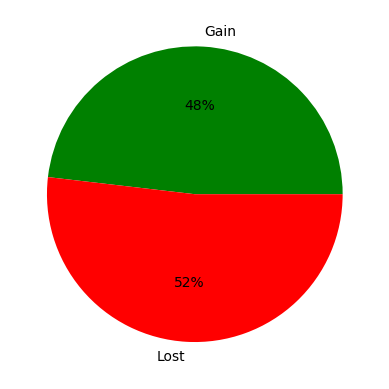

In [16]:
gain=data[data['change_percent']<0]['date'].count()
lost=data[data['change_percent']>0]['date'].count()

labels=['Gain','Lost']
sizes=[gain,lost]
colors=['g','r']
plt.pie(sizes,labels=labels,autopct='%1.f%%',colors=colors)

plt.show

**SUMMARY**

**This is the Tesla stock data Exploratary Data analysis Here we used pandas and Matplotlib libraries for data cleaning and visualisation Here we observe tesla stock have high volatile in the span of 2020 to 2023 in this span stock price reach to around 2000 and again decline to 300 In between the 2010 to 2023 tesla in negaside of 52% of days**